###**Connecting Google Drive**

In [1]:
# a = []
# while(1):
#     a.append("1")                                                                                                                                                                                                                                                                                                          

In [2]:
! python --version

Python 3.6.9


In [3]:
from google.colab import drive
import os
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/Yours ANN :))')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wFAKmOsQqeBpHaXFFTCLfxO4z6_gf9NcbT5_clXyko2GFkal02mYRE
Mounted at /content/drive


In [4]:
os.listdir()

['.ipynb_checkpoints',
 'volume-49.nii.gz',
 'labels-49.nii.gz',
 'volume-91.nii.gz',
 'hi！',
 'all datasets',
 'README.txt',
 'labels',
 'hi!-labels',
 'labels-91.nii.gz',
 'Model_logs',
 'data2.npy',
 'labels2.npy',
 'hilabels.npy',
 'Y_pre1.npy',
 'hi.npy',
 'data1.npy',
 'labels1.npy',
 'X_train1.npy',
 'Y_train1.npy',
 'Y_test1.npy',
 'unet.png',
 'X_test1.npy',
 'X_val1.npy',
 'Y_val1.npy',
 'weights.hdf5',
 'Try_a_simple_One_555.ipynb']

In [5]:
!pip install SimpleITK

     |████████████████████████████████| 42.5MB 100kB/s 


In [6]:
path='/content/drive/My Drive/Yours ANN :))/hi！/'
pathlabels='/content/drive/My Drive/Yours ANN :))/hi!-labels/'

path1='/content/drive/My Drive/Yours ANN :))/all datasets/volumes 0-69/'
path2='/content/drive/My Drive/Yours ANN :))/all datasets/volumes 70-139/'
pathlabels1='/content/drive/My Drive/Yours ANN :))/labels/labels 0-69/'
pathlabels2='/content/drive/My Drive/Yours ANN :))/labels/labels 70-139/'

In [7]:
import SimpleITK as sitk 
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# my_dir = os.listdir(path2)
# print(my_dir[:30])
# for p in tqdm(my_dir):
#   data_list = path1+p
#   print(data_list)
#   print(p)
#   img_itk = sitk.ReadImage(path1 + p)
#   image = sitk.GetArrayFromImage(img_itk)
#   break

(1, 751, 512, 512)


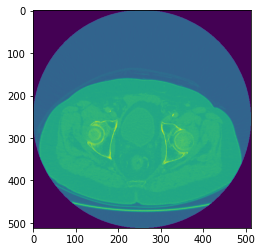

(1, 751, 512, 512)
uint8


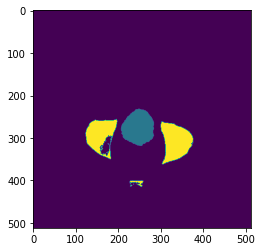

In [33]:
#  Using simpleitk to get the z-latitude median to see the 2D effect of a CT
img_itk = sitk.ReadImage("/content/drive/My Drive/Yours ANN :))/volume-49.nii.gz")
#  <class 'SimpleITK.SimpleITK.Image'>
image = sitk.GetArrayFromImage(img_itk)
#  <class 'numpy.ndarray'>
# print(image.shape)
# (254, 512, 512)
data=[]
data.append(image)
#  <class 'list'>
data = np.asarray(data,dtype=np.float32)
#  <class 'numpy.ndarray'>
print(data.shape)
# (1, 254, 512, 512)
# print("The pic of volume-49:")
# print(np.mean(data),np.max(data))
data = (data-np.mean(data))/np.max(data)
# print(np.mean(data),np.max(data),np.min(data))
import matplotlib.pyplot as plt
plt.imshow(data[0,128,:,:])
# plt.imshow(data[0,128,:,:],vmin=0,vmax=1)
plt.show()


from keras.utils import to_categorical,normalize
img_itk2 = sitk.ReadImage("/content/drive/My Drive/Yours ANN :))/labels-49.nii.gz")
#  <class 'SimpleITK.SimpleITK.Image'>
image2 = sitk.GetArrayFromImage(img_itk2)
#  <class 'numpy.ndarray'>
data2=[]
data2.append(image2)
#  <class 'list'>
data2 = np.asarray(data2,dtype=np.uint8)
#  <class 'numpy.ndarray'>
print(data2.shape)
# (1, 254, 512, 512)
# data2=to_categorical(data2,num_classes=6)        #yellow=1,blue=0
# (1, 254, 512, 512, 6)
print(data2.dtype)
import matplotlib.pyplot as plt
# for i in range (0,6):
plt.imshow(data2[0,128,:,:])
plt.show()


0
56.266048431396484
255


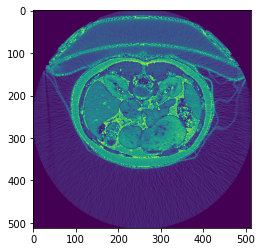

0.0
56.26605
255.0


In [10]:
# Get the three dimensions of each CT, finding that each one has a different z-latitude, so we change 3D to 2D to get the plain image
pathtry="/content/drive/My Drive/Yours ANN :))/volume-49.nii.gz"
img_itk = sitk.ReadImage(pathtry)
image = sitk.GetArrayFromImage(img_itk)
shape=image.shape
z=shape[0]//2
b=image[z]
# b.resize(512,512,1)
b = np.asarray(b,dtype=np.uint8)
print(np.min(b))
print(np.mean(b))
print(np.max(b))
import matplotlib.pyplot as plt
plt.imshow(b[:,:])
plt.show()

# image = np.expand_dims(b, axis=2)
# image = np.concatenate((image, image, image), axis=-1)
# print(image.shape)


# print("After resizing the z-latitude: ",np.array(b).shape)
# print("\n")
data=[]
data.append(b)

# data = np.asarray(data,dtype=np.uint8)
data = np.asarray(data,dtype=np.float32)
print(np.min(data))
print(np.mean(data))
print(np.max(data))
# import matplotlib.pyplot as plt
# plt.imshow(data[0,:,:,0])
# plt.show()


In [11]:
def load_data(path):
  my_dir = sorted(os.listdir(path))
  data = []
  for p in tqdm(my_dir):
    img_itk = sitk.ReadImage(path + p)
    image = sitk.GetArrayFromImage(img_itk)
    shape=image.shape
    z=shape[0]//2
    image=image[z]
    # image = np.asarray(image,dtype=np.uint8)
    image.resize(512,512,1)
    data.append(image)
  data = np.asarray(data,dtype=np.float32) # [array([[[...]]],dtype=float32), array([[[...]]],dtype=float32),...,...] 
  return data

def load_label(path):
  my_dir = os.listdir(path)
  label = []
  for p in tqdm(my_dir):
    img_label = sitk.ReadImage(path + p)
    image = sitk.GetArrayFromImage(img_label)
    shape=image.shape
    z=shape[0]//2
    image=image[z]
    image.resize(512,512,1)
    label.append(image)
  label = np.asarray(label,dtype=np.uint8)
  return label

###**Loading data from CT scans and saving for usage**

In [12]:
# data = load_data(path)   # dividing data into 2 parts 
# np.save('hi.npy',data) 

In [13]:
# labels = load_label(pathlabels)   # dividing data into 2 parts 
# np.save('hilabels.npy',labels) 

In [14]:
# for volumes 0-69,70-139
# data1 = load_data(path1)   # dividing data into 2 parts 
# np.save('data1.npy',data1) 

In [15]:
# data2 = load_data(path2)   # dividing data into 2 parts 
# np.save('data2.npy',data2) 
# print("All datasets have been cropped to the same size and saved")

In [16]:
# #for labels 0-69,70-139
# labels1 = load_label(pathlabels1)   # dividing data into 2 parts 
# np.save('labels1.npy',labels1) 

In [17]:
# labels2 = load_label(pathlabels2)   # dividing data into 10 parts 
# np.save('labels2.npy',labels2) 
# print("All labels have been cropped to the same size and saved")

In [18]:
data = np.load('/content/drive/My Drive/Yours ANN :))/hi.npy')
gt = np.load('/content/drive/My Drive/Yours ANN :))/hilabels.npy')

data1 = np.load('/content/drive/My Drive/Yours ANN :))/data1.npy')
gt1 = np.load('/content/drive/My Drive/Yours ANN :))/labels1.npy')

# data2 = np.load('/content/drive/My Drive/Yours ANN :))/data2.npy')
# gt2 = np.load('/content/drive/My Drive/Yours ANN :))/labels2.npy')

In [19]:
data.shape,   gt.shape,    data.dtype,    gt.dtype

((20, 512, 512, 1), (20, 512, 512, 1), dtype('float32'), dtype('uint8'))

In [20]:
print("Data1 and Labels1 shape：")
data1.shape,   gt1.shape,    data1.dtype,    gt1.dtype

Data1 and Labels1 shape：


((70, 512, 512, 1), (70, 512, 512, 1), dtype('float32'), dtype('uint8'))

In [21]:
# print("Data2 and Labels2 shape：")
# data2.shape,   gt2.shape,    data2.dtype,    gt2.dtype

###**Pre-Processing of data**

In [22]:
# gt[np.where(gt==6)]=5   #converting ground truth value of 6 to 5 to do one hot encoding (Consider value 5 in results in output as class 6)

In [23]:
from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(data, gt, test_size=0.05, random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(data1, gt1, test_size=0.15, random_state=42)
# X_train, X_test, Y_train, Y_test = train_test_split(data2, gt2, test_size=0.15, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3,random_state=42)

In [24]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [25]:
X_train.shape,Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((41, 512, 512, 1),
 (41, 512, 512, 1),
 (18, 512, 512, 1),
 (18, 512, 512, 1),
 (11, 512, 512, 1),
 (11, 512, 512, 1))

In [26]:
print(Y_train.dtype)

uint8


In [27]:
# print(Y_train[0,250,:,0])

In [28]:
# 将标签转换为分类的 one-hot 编码
from keras.utils import to_categorical,normalize  
Y_train = to_categorical(Y_train,num_classes=6)
Y_val = to_categorical(Y_val,num_classes=6)
# Y_test = to_categorical(Y_test)
X_train = (X_train-np.mean(X_train))/np.std(X_train)
X_test = (X_test-np.mean(X_test))/np.std(X_test)
X_val = (X_val-np.mean(X_val))/np.std(X_val)

In [29]:
# import keras

# data=keras.utils.to_categorical([2,3])   #num_classes是none的情况
# # data=keras.utils.to_categorical([[2],[3]])
# print(data)
# """
# [[0. 0. 1. 0.]
#  [0. 0. 0. 1.]]
# """
# data=keras.utils.to_categorical([2,3],num_classes=5)
# print(data)
# """
# [[0. 0. 1. 0. 0.]
#  [0. 0. 0. 1. 0.]]


In [30]:
X_train.shape,Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((41, 512, 512, 1),
 (41, 512, 512, 6),
 (18, 512, 512, 1),
 (18, 512, 512, 6),
 (11, 512, 512, 1),
 (11, 512, 512, 1))

In [31]:
X_train.dtype,Y_train.dtype, X_val.dtype, Y_val.dtype, X_test.dtype, Y_test.dtype

(dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('uint8'))

In [32]:
#Saving the data one by one total set 4
np.save('X_train1.npy',X_train)
np.save('Y_train1.npy',Y_train)
np.save('X_val1.npy',X_val)
np.save('Y_val1.npy',Y_val)
np.save('X_test1.npy',X_test)
np.save('Y_test1.npy',Y_test)

KeyboardInterrupt: ignored

###**U-net + dice loss**

####**Loading data**

In [ ]:
import numpy as np

In [ ]:
# X_train = np.load('X_train2.npy')
# Y_train = np.load('Y_train2.npy')

In [ ]:
# X_val = np.load('X_val2.npy')
# Y_val = np.load('Y_val2.npy')

In [ ]:
X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

In [ ]:
# X_train = np.transpose(X_train,(1,2,0))

In [ ]:
# Y_train = np.transpose(Y_train,(1,2,0,3))

In [ ]:
# X_val = np.transpose(X_val,(1,2,0))

In [ ]:
# Y_val = np.transpose(Y_val,(1,2,0,3))

In [ ]:
# X_train.shape,Y_train.shape,X_val.shape,Y_val.shape

In [ ]:
%tensorflow_version 1.x
from keras.models import Model
from keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,concatenate,Input,Dropout,Maximum,Activation,Dense,Flatten,UpSampling2D,Conv2DTranspose
from keras.optimizers import SGD,Adam,RMSprop
import keras.callbacks as callbacks
import keras.initializers as initializers
from keras.callbacks import Callback
from keras import regularizers

####**U-Net**

In [ ]:
############################################ U-net #############################################

############ Encoder #############
input_ = Input(shape=(512,512,1),name='input')                                              

block1_conv1 = Conv2D(64,(3, 3),padding='same',activation='relu',name='block1_conv1')(input_)
block1_conv2 = Conv2D(64,(3, 3),padding='same',activation='relu',name='block1_conv2')(block1_conv1)
block1_norm = BatchNormalization(name='block1_batch_norm')(block1_conv2)
block1_pool = MaxPooling2D(name='block1_pool')(block1_norm)

block2_conv1 = Conv2D(128,(3, 3),padding='same',activation='relu',name='block2_conv1')(block1_pool)
block2_conv2 = Conv2D(128,(3, 3),padding='same',activation='relu',name='block2_conv2')(block2_conv1)
block2_norm = BatchNormalization(name='block2_batch_norm')(block2_conv2)
block2_pool = MaxPooling2D(name='block2_pool')(block2_norm)

encoder_dropout_1 = Dropout(0.2,name='encoder_dropout_1')(block2_pool)

block3_conv1 = Conv2D(256,(3, 3),padding='same',activation='relu',name='block3_conv1')(encoder_dropout_1)
block3_conv2 = Conv2D(256,(3, 3),padding='same',activation='relu',name='block3_conv2')(block3_conv1)
block3_norm = BatchNormalization(name='block3_batch_norm')(block3_conv2)
block3_pool = MaxPooling2D(name='block3_pool')(block3_norm)

block4_conv1 = Conv2D(512,(3, 3),padding='same',activation='relu',name='block4_conv1')(block3_pool)
block4_conv2 = Conv2D(512,(3, 3),padding='same',activation='relu',name='block4_conv2')(block4_conv1)
block4_norm = BatchNormalization(name='block4_batch_norm')(block4_conv2)
block4_pool = MaxPooling2D(name='block4_pool')(block4_norm)
################### Encoder end ######################

block5_conv1 = Conv2D(1024,(3, 3),padding='same',activation='relu',name='block5_conv1')(block4_pool)
encoder_dropout_2 = Dropout(0.2,name='encoder_dropout_2')(block5_conv1)

########### Decoder ################

up_pool1 = Conv2DTranspose(1024,(3, 3),strides = (2, 2),padding='same',activation='relu',name='up_pool1')(block5_conv1)
merged_block1 = concatenate([block4_norm,up_pool1],name='merged_block1')
decod_block1_conv1 = Conv2D(512,3, padding = 'same', activation='relu',name='decod_block1_conv1')(merged_block1)

up_pool2 = Conv2DTranspose(512,(3, 3),strides = (2, 2),padding='same',activation='relu',name='up_pool2')(decod_block1_conv1)
merged_block2 = concatenate([block3_norm,up_pool2],name='merged_block2')
decod_block2_conv1 = Conv2D(256,(3, 3),padding = 'same',activation='relu',name='decod_block2_conv1')(merged_block2)

decoder_dropout_1 = Dropout(0.2,name='decoder_dropout_1')(decod_block2_conv1)

up_pool3 = Conv2DTranspose(256,(3, 3),strides = (2, 2),padding='same',activation='relu',name='up_pool3')(decoder_dropout_1)
merged_block3 = concatenate([block2_norm,up_pool3],name='merged_block3')
decod_block3_conv1 = Conv2D(128,(3, 3),padding = 'same',activation='relu',name='decod_block3_conv1')(merged_block3)

up_pool4 = Conv2DTranspose(128,(3, 3),strides = (2, 2),padding='same',activation='relu',name='up_pool4')(decod_block3_conv1)
merged_block4 = concatenate([block1_norm,up_pool4],name='merged_block4')
decod_block4_conv1 = Conv2D(64,(3, 3),padding = 'same',activation='relu',name='decod_block4_conv1')(merged_block4)
############ Decoder End ######################################

decoder_dropout_2 = Dropout(0.2,name='decoder_dropout_2')(decod_block4_conv1)

pre_output = Conv2D(64,(1,1),padding = 'same',activation='relu',name='pre_output')(decod_block4_conv1)

output = Conv2D(7,(1,1),padding='same',activation='softmax',name='output')(pre_output)

model = Model(inputs = input_, outputs = output)
model.summary()

In [ ]:
from keras.utils import  plot_model
plot_model(model,to_file='unet.png',show_shapes=True)

####**Dice Loss**

In [ ]:
import keras

In [ ]:
# b = np.array([[1, 2], [3, 4]])
# print(b.shape,'\n',b)
# b1=np.tile(b, 2)
# print(b1.shape,'\n',b1)
# b2=np.tile(b, (3,1, 1))
# print(b2.shape,'\n',b2)

In [ ]:
from keras import backend as K 
def dice_coef(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection) / (K.sum(K.square(y_true),axis=-1) + K.sum(K.square(y_pred),axis=-1) + epsilon)

def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

现有的梯度下降中的一些超参数是在归一化之后的输入数据范围内搜到的。你如果参考别人的算法超参数，只有数值计算的范围一致，才有可能达到相同的结果。

In [ ]:
model.compile(optimizer=Adam(lr=1e-5),loss=dice_coef_loss,metrics=[dice_coef])
# keras读取h5文件 1、keras.models.load_model() 读取网络、权重   2、keras.models.load_weights() 仅读取权重; load_model代码包含load_weights的代码，区别在于load_weights时需要先有网络、并且load_weights需要将权重数据写入到对应网络层的tensor中。
# model.load_weights('/content/drive/My Drive/Yours ANN :))/weights.hdf5')
checkpointer = callbacks.ModelCheckpoint(filepath = '/content/drive/My Drive/Yours ANN :))/weights.hdf5',save_best_only=True)   # 在每个训练期之后保存模型 
# Tensorboard 实现基本可视化; TensorBoard 是由Tensorflow提供的一个可视化工具; 这个回调函数为Tensorboard编写一个日志,这样你可以可视化测试和训练的标准评估的动态图像,也可以可视化模型中不同层的激活值直方图.
training_log = keras.callbacks.TensorBoard(log_dir='/content/drive/My Drive/Yours ANN :))/Model_logs') 

In [ ]:
history = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size=4,epochs=10,callbacks=[training_log,checkpointer],shuffle=True)

In [ ]:
# summarize history for loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('dice coef loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['dice_coef'])
plt.plot(history.history['val_dice_coef'])
plt.title('model score')
plt.ylabel('dice coef')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
X_test = np.load('./X_test1.npy')
Y_test = np.load('./Y_test1.npy')

In [ ]:
Y_pre = model.predict(X_test)

In [ ]:
Y_pre.dtype

In [ ]:
# print(Y_pre)

In [ ]:
np.save('Y_pre1.npy',Y_pre)

In [ ]:
# np.unique(Y_pre)

In [ ]:
Y_test.shape,X_test.shape,Y_pre.shape

In [ ]:
Y_test.dtype,X_test.dtype,Y_pre.dtype

In [ ]:
for i in range(0,4):
  print('X_test '+ str(i))
  plt.imshow(X_test[i,:,:,0])
  plt.show()
  for j in range(0,6):
    plt.imshow(Y_pre[i,:,:,j])
    plt.show()
  plt.imshow(Y_test[i,:,:,0])
  plt.show()